In [26]:
import pandas as pd
from matplotlib import pyplot as plt

#### The visualization that I would use is the line graph. Over the last week I have looked at many different data visualizations. However, the line graph to me is easy to understand and also is great for representing the type of data I am thinking of. One of the main goals in my career is to make enough so that my wife does not have to work if she does not want to. So, a line graph representing software engineer salaries over time in Ohio would be helpful to understand if this career field is expanding. I also considered a hexbin visualization. In that case we could try to break down salary by county. Which then led me to think of the forbidden fruit, geospatial data. Though, I would imagine that would take quite some time to learn and create. The example below is a screenshot from a Bureau of Labor Statistics site. Clearly this is a web application using some form of HighCharts, however the visual is appropriate. [BLS Site] In our case the color of the county could represent salary from high to low. Green means higher salary, red means lower(just one example). Then a simple salary summary number on each county (76k). When hovering could have the max, min, and average. [BLS](https://data.bls.gov/maps/cew/OH?period=2024-Q1&industry=10&geo_id=39000&chartData=3&distribution=1&pos_color=blue&neg_color=orange&showHideChart=show&ownerType=0)
![title](ohio.png)

In [27]:
df = pd.read_csv('cces_example_data.csv')
df.head()

,pew_religimp,pew_churatd,sex,educ,nonwhite,age,faminc_new,pid3,ideo5,QueerPhobia,...,InterGBiasParty,InterGBiasCand,InterGBiasSup,LibMediaUse,ConMediaUse,Real_Threat,Symb_Threat,Evaluation,teamweight,caseid
0,2,6,2,2,1,56,6,1,1,1.000000,...,-99,-99,-96,2.666667,1.000000,5.00,4.857143,0,0.505028,1231308943
1,2,4,2,5,1,53,13,1,2,3.000000,...,-100,-100,-100,2.000000,2.000000,5.00,5.000000,0,0.852381,1232300315
2,1,2,1,2,1,69,10,2,5,4.333333,...,99,99,96,1.000000,1.000000,5.00,5.000000,2,1.320189,1232358697
3,2,3,1,6,1,76,97,1,3,1.000000,...,-86,-91,-89,4.666667,1.333333,4.25,4.428571,0,0.519198,1232540961
4,4,5,2,6,1,83,4,1,2,1.000000,...,-80,-88,-87,4.666667,3.666667,4.25,5.000000,0,1.154005,1232580601


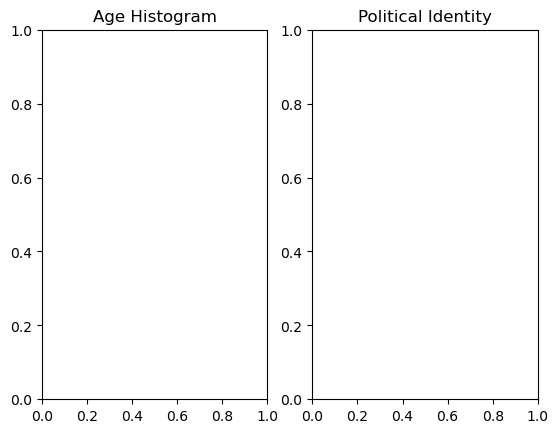

In [28]:
fig1, ax1 = plt.subplots(1, 2)

ax1[0].set_title('Age Histogram')
ax1[1].set_title('Political Identity')


plt.show()

Figure contain information for data rules for mapping size for layout etc. Figure is the overall container for working in matplotlib.

Axes are separate plots(columns) within figure, Can have room for multiple axes in figure

Axis is the actual x y axis 
Subplot is 1 row of axes and 2 columns of axis

Going to try to use the groupby function on the Evaluation column to get the 0,1,2,3 values together. Then we will use the sum function to get the total for each. I tried to understand what the numbers may represent in relation to the data (some type of Likert scale or a variable that shows strength of correlation of some other values?). For the purposes of this assignment I will assume they are integer values.

In [29]:
evaluationSumGroupBy = df.groupby('Evaluation')['Evaluation'].sum()

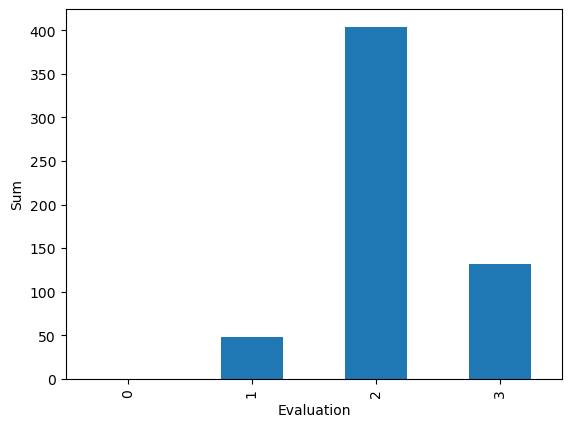

In [30]:
evaluationSumGroupBy.plot(kind='bar')
plt.xlabel('Evaluation')
plt.ylabel('Sum')
plt.show()

I was wrong in the column above. I was thinking sum would count the occurrences of 0,1,2 or 3 and then add those occurences up for each different value. Sum however, will add all of the values up based on each integer. So, the 0 will be 0+0+0 (0*n), 1 will be 1*n etc. The other two options I saw in relation to groupby were count and size. The difference between these two is that count will not count null or missing values. Also, at some point I need to figure out why that legend is smack dab in the middle of the data. I also don't like that the labels aren't aligning with the data point. I am including count after the fact because count and size are similar but different. Count excludes missing values, size includes them.

In [31]:
evaluationSizeGroupBy = df.groupby('Evaluation')['Evaluation'].size()
evaluationCountGroupBy = df.groupby('Evaluation')['Evaluation'].count()

Going to combine the two different figures into one for my own comparison (added count as well). In (0,0) we see our logic from earlier visualized. 0 shows 0 (0*0*0 an n number of times). On the left, we see that now we have the total occurrences of each of our possible values(which is what I was looking ofr). What is interesting is that of course count and size look exactly the same. Because they are! Though size counts missing values, they will not automatically display unless we explixitly say to. In the data set there are no missing values in Evaluation. Let's just assume that Evaluation is a Likert scale. If there is a missing data point it could mean the person was uncomfortable with answering the question. Which is a datapoint we might be able to infer something from. So, when using size, do not assume that missing values will be displayed. But still understand the diff between count and size.

Text(0, 0.5, 'Count')

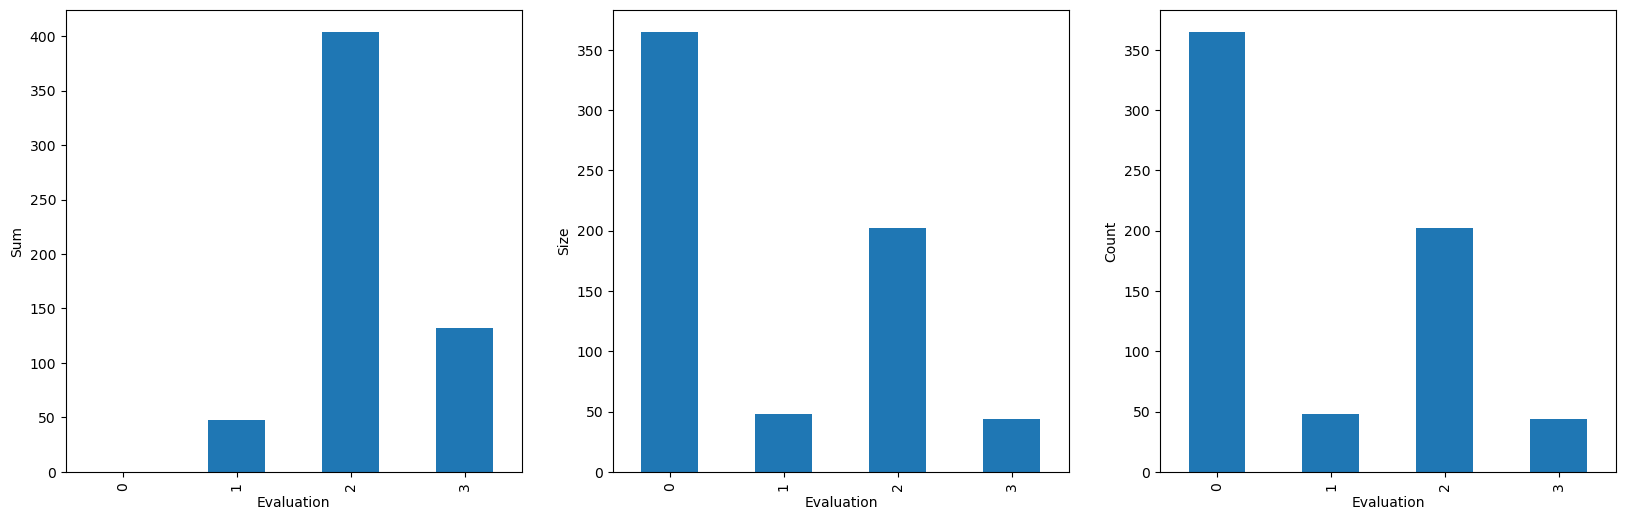

In [32]:
fig2, axes2 = plt.subplots(1, 3, figsize=(20, 6))

evaluationSumGroupBy.plot(kind='bar', ax=axes2[0])
axes2[0].set_xlabel('Evaluation')
axes2[0].set_ylabel('Sum')

evaluationSizeGroupBy.plot(kind='bar', ax=axes2[1])
axes2[1].set_xlabel('Evaluation')
axes2[1].set_ylabel('Size')

evaluationCountGroupBy.plot(kind='bar', ax=axes2[2])
axes2[2].set_xlabel('Evaluation')
axes2[2].set_ylabel('Count')

Now will begni work on the scatterplot

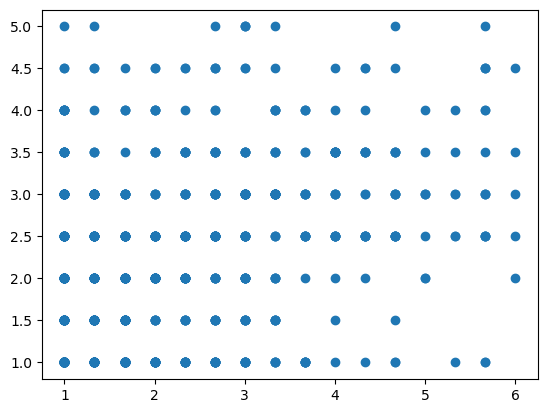

In [33]:
conMedia = df['ConMediaUse']
immiPhobia = df['ImmiPhobia']


fig5, ax5 = plt.subplots()

ax5.scatter(conMedia, immiPhobia) #x is conMedia, y is immiPhobia

plt.show()

For the scatterplot above we can do a few things to improve it's usefulness.
- [Color](https://clauswilke.com/dataviz/color-basics.html#color-as-a-tool-to-distinguish)
  Color can be used to better show different points of data by setting the color values to be visually recognizable. 
- [Transparency](https://clauswilke.com/dataviz/overlapping-points.html#partial-transparency-and-jittering)
  By setting the alpha (transparency) value we allow viewers to see when there may be overlapping points of data. Additionally, by ofsetting each point by a small amount (not enough to affect the accuracy of the data), the viewer can better understand where points are overlapping.
- [Figure & Subplots](https://matplotlib.org/cheatsheets/_images/handout-beginner.png)
  We can change the figure (icons) used to represent points so that each has a different shape. Additionally, we could potentially fill in the subplot method so and use that to split the representation into two different columns.
- [Jitter](https://clauswilke.com/dataviz/overlapping-points.html#partial-transparency-and-jittering)I believe in there is no direct property for Jitter like there is in Seaborn. However, thinking about how we might accomplish that: we would have to use some small random number to move the points randomly a very small amount. Do some type of algorithm where each data point gets that random amount subtracted or added to it which then will move it over. Possibly, even some type of compare logic? Where we compare the points to make sure our other points don't "randomly" map to other points with similar values? Though, I would guess that for this purpose just the random number generator would be sufficient.